

---

# Building Model From Scratch


---





### Linear Regression


---




 Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

dw.png

db.png

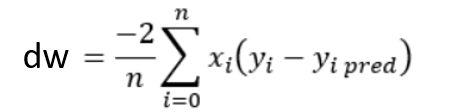




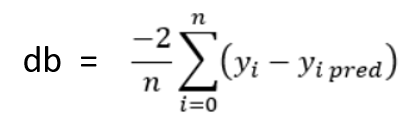


In [ ]:
# inporting the library

import numpy as np



Linear Regression

In [ ]:
class Linear_Regression():

# initating the paramaters (learning rate and no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # number of traning examples and number of features
    self.m, self.n = X.shape   # number of rows and column

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self, ):

    Y_prediction = self.predict(self.X)

    # calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    # updating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db



  def predict(self, X):

    return X.dot(self.w) + self.b

using Linear Regression for prediction of a model


In [ ]:
# importing library
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data pre-processing

In [ ]:
# loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv('/content/salary_data (1).csv')

In [ ]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [ ]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature & target

In [ ]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

Training the Linear Regression model



In [ ]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)


In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


Predict the salary value for test data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values & actual Values



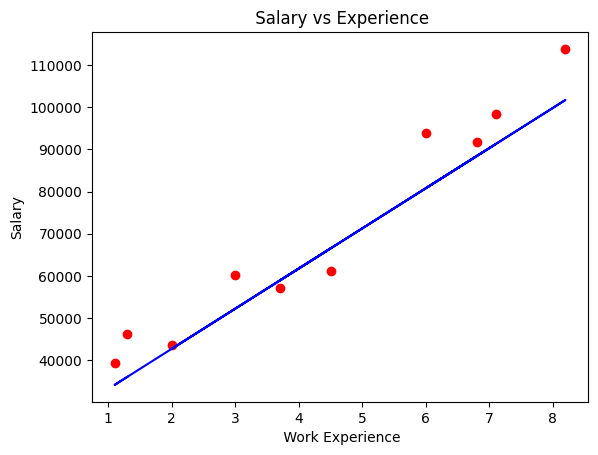

In [ ]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()



### Logistic Regression


---



Logistic Regression:



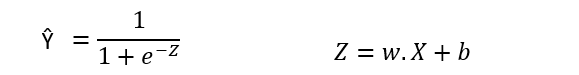



Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Derivatives:

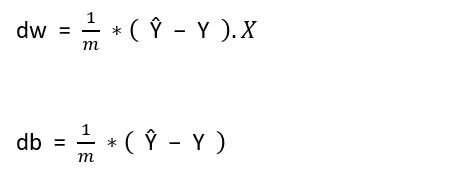

In [ ]:
# importing numpy library
import numpy as np

Logistic Regression



In [ ]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  # fit function to train the model with some datasets
  def fit(self, X, Y):

    # no. of data points in datasets (no. of rows) ---> m
    # no. of input feature in datasets (no. of col) --> n
    self.m, self.n = X.shape

    # initiating weight & bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

      # Y_hat formula (sigmoid function)
      Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))

      # derivatives
      dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
      db = (1/self.m)*np.sum(Y_hat - self.Y)

      # updating weight and bias using gradient descent
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  # Sigmoid equation & decision boundary

  def predict(self, X):

    Y_prediction = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_prediction = np.where( Y_prediction > 0.5, 1, 0)
    return Y_prediction

importing the dependencies

In [ ]:
# importing library
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data collection and Analysis

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes (1).csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
features = diabetes_dataset.drop(columns = 'Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [ ]:
print(features)


     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(target)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization



In [ ]:
scaler = StandardScaler()
scaler.fit(features)


StandardScaler()

In [ ]:
standardized_data = scaler.transform(features)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [ ]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)
print(features.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


Training the Model



In [ ]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

Model Evaluation


Accuracy Score



In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  0.7768729641693811


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(




### SVM Classifier


---



SVM Classifier

Equation of the Hyperplane:

y = wx - b

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Importing the Dependencies



In [ ]:
# importing numpy library
import numpy as np

Support Vector Machine Classifier



In [ ]:
class SVM_classifier():

  # initiating the hyperparameters
  def __init__(self, no_of_iterations, learning_rate, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    #label encoding
    y_label = np.where(self.Y <= 0, -1, 1)

    # Gradient (dw, db)
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True ):
        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:
        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db





  # predict the label for a given input value
  def predict(self, X):
    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output)
    y_hat = np.where(predicted_labels <= -1, 0, 1)
    return y_hat

Importing the Dependencies

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [ ]:
# loading the data from csv file to pandas dataframe
diabetes_data = pd.read_csv('/content/diabetes (1).csv')

In [ ]:
# print the first 5 rows of the dataframe
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and columns in the dataset
diabetes_data.shape

(768, 9)

In [ ]:
# getting the statistical measures of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


0 --> Non-diabetic

1 --> Diabetic

In [ ]:
# separating the features and target

features = diabetes_data.drop(columns='Outcome', axis=1)

target = diabetes_data['Outcome']

In [ ]:
print(features)


     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(target)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization



In [ ]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(features)
print(standardized_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features = standardized_data
target = diabetes_data['Outcome']

In [ ]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

Support Vector Machine Classifier

In [ ]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)
# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score on training data = ', training_data_accuracy)

Accuracy score on training data =  0.7768729641693811


In [ ]:
# accuracy on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.7532467532467533


Building a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')

else:
  print('The Person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The Person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



### Lasso Regression


---



Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Gradient for Weights

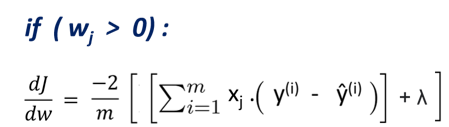

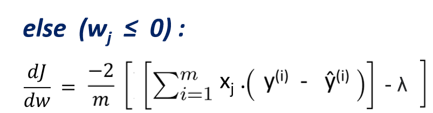

Gradient for Bias

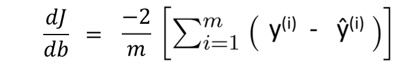

Importing the Dependencies

In [ ]:
# Importing the Library
import numpy as np

Lasso Regression



In [ ]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent algorithm for optimization
    for i in range (self.no_of_iterations):
      self.update_weights()

  # function for updating the weight & bias value
  def update_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)


    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:
        dw[i] = (-(2*(self.X[:,i].dot(self.Y - Y_prediction)) + self.lambda_parameter)) / self.m

      else:
        dw[i] = (-(2*(self.X[:,i].dot(self.Y - Y_prediction)) - self.lambda_parameter)) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  # Predicting the Target variable
  def predict(self, X):

    return X.dot(self.w) + self.b

Using Linear Regression model for Prediction



In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

Data Pre-Processing



In [ ]:
  # loading the data from csv file to a pandas dataframe

salary_data = pd.read_csv('/content/salary_data (1).csv')

In [ ]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [ ]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature & target



In [ ]:
features = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values

In [ ]:
print(features)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(target)


[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.33, random_state = 2)

Training the Linear Regression model

In [ ]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,lambda_parameter=200)
model.fit(X_train, Y_train)


Predict the salary value for test data



In [ ]:
test_data_prediction = model.predict(X_test)


In [ ]:
print(test_data_prediction)


[ 36063.3511964   34160.34716428  66511.41571047  58899.39958195
  91250.46812814  80783.94595143 101716.99030485  52238.8854695
  42723.86530886  88395.96207995]


In [ ]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9041211160417248
Mean Absolute Error :  6676.299968901626


Comparing the error with SKLearn Lasso Regression



In [ ]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [ ]:
sk_model.fit(X_train, Y_train)


Lasso()

In [ ]:
sk_test_data_prediction = sk_model.predict(X_test)


In [ ]:
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(Y_test, sk_test_data_prediction)

print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.9041817142395875
Mean Absolute Error :  6673.480440148538
